# Euchre hand results clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load in data

In [2]:
pwd

'/Users/jeremy/Desktop/nonsense/euchre/notebooks'

In [3]:
raw_hand_results_df = pd.read_csv('all_hand_results.csv')

In [4]:
raw_hand_results_df.shape

(502256, 16)

In [5]:
raw_hand_results_df.head()

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,num_off_A,num_off_K,num_off_Q,num_suits,partner_tricks,player_seat
0,2,0,0,0,1,0,1,1,0,0,0,1,1,3,0,4
1,3,1,0,1,0,1,0,0,1,0,0,0,1,2,0,1
2,0,0,1,0,0,0,0,0,0,0,0,2,0,3,3,2
3,0,0,0,0,0,0,0,0,0,1,1,0,1,3,2,3
4,0,0,1,0,0,0,0,0,0,0,0,1,0,3,2,1


In [6]:
raw_hand_results_df.isnull().sum()

tricks_won           0
is_calling_player    0
teammate_called      0
has_right            0
has_left             0
has_Atrump           0
has_Ktrump           0
has_Qtrump           0
has_Ttrump           0
has_9trump           0
num_off_A            0
num_off_K            0
num_off_Q            0
num_suits            0
partner_tricks       0
player_seat          0
dtype: int64

In [7]:
def make_player_seat_categorical(df):
    """
    Function to transform player seat field into categorical columns from given df
    """
    df['player_seat1'] = np.where(df['player_seat']==1,1,0)
    df['player_seat2'] = np.where(df['player_seat']==2,1,0)
    df['player_seat3'] = np.where(df['player_seat']==3,1,0)
    df['player_seat4'] = np.where(df['player_seat']==4,1,0)
    return df

In [8]:
raw_hand_results_df = make_player_seat_categorical(raw_hand_results_df)

In [9]:
raw_hand_results_df.columns

Index(['tricks_won', 'is_calling_player', 'teammate_called', 'has_right',
       'has_left', 'has_Atrump', 'has_Ktrump', 'has_Qtrump', 'has_Ttrump',
       'has_9trump', 'num_off_A', 'num_off_K', 'num_off_Q', 'num_suits',
       'partner_tricks', 'player_seat', 'player_seat1', 'player_seat2',
       'player_seat3', 'player_seat4'],
      dtype='object')

In [10]:
# Add column for count of occurrences of same exact hand
raw_hand_results_df['occurrences'] = raw_hand_results_df.groupby(raw_hand_results_df.columns.tolist()).transform('size')

In [11]:
# Drop duplicates
hand_results_df = raw_hand_results_df.drop_duplicates().copy()

In [12]:
hand_results_df.shape

(89347, 21)

In [13]:
hand_results_df.head()

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,...,num_off_K,num_off_Q,num_suits,partner_tricks,player_seat,player_seat1,player_seat2,player_seat3,player_seat4,occurrences
0,2,0,0,0,1,0,1,1,0,0,...,1,1,3,0,4,0,0,0,1,3
1,3,1,0,1,0,1,0,0,1,0,...,0,1,2,0,1,1,0,0,0,17
2,0,0,1,0,0,0,0,0,0,0,...,2,0,3,3,2,0,1,0,0,69
3,0,0,0,0,0,0,0,0,0,1,...,0,1,3,2,3,0,0,1,0,13
4,0,0,1,0,0,0,0,0,0,0,...,1,0,3,2,1,1,0,0,0,73


In [14]:
hand_results_df.columns

Index(['tricks_won', 'is_calling_player', 'teammate_called', 'has_right',
       'has_left', 'has_Atrump', 'has_Ktrump', 'has_Qtrump', 'has_Ttrump',
       'has_9trump', 'num_off_A', 'num_off_K', 'num_off_Q', 'num_suits',
       'partner_tricks', 'player_seat', 'player_seat1', 'player_seat2',
       'player_seat3', 'player_seat4', 'occurrences'],
      dtype='object')

In [15]:
hand_results_df['num_trump'] = (hand_results_df['has_right'] + 
                                hand_results_df['has_left'] + 
                                hand_results_df['has_Atrump'] + 
                                hand_results_df['has_Ktrump'] + 
                                hand_results_df['has_Qtrump'] + 
                                hand_results_df['has_Ttrump'] + 
                                hand_results_df['has_9trump'])

In [16]:
hand_results_df['team_tricks'] = (hand_results_df['tricks_won'] + hand_results_df['partner_tricks'] )

In [17]:
def create_description_field(row):
    """
    This function takes a row from the dataframe and translates binary columns 
    into a descriptive string based on a predefined logic
    
    Args:
      row: A pandas Series representing a single row of the dataframe
    
    Returns:
      A string describing the events that occurred in the hand
    """
    
    description = ""

    # Who called trump
    if row['is_calling_player']==1:
        description += 'Player 1 called trump'
    elif row['teammate_called']==1:
        description += 'Teammate called trump'
    else:
        description += 'Opponent called trump'

    # who took what tricks
    description += f"; P1 took {row['tricks_won']}"
    description += f", Teammate took {row['partner_tricks']}"

    # # P1 hand summary
    # description += f"; P1 hand - {row['num_trump']} trump - "
    # if row['has_right']==1:
    #     description += "R"
    # if row['has_left']==1:
    #     description += "L"

    return description

In [18]:
# Apply the translation function to each row and create a new column
hand_results_df['description'] = hand_results_df.apply(create_description_field, axis=1)

In [19]:
hand_results_df['description'].value_counts().head(20)

description
Opponent called trump; P1 took 2, Teammate took 0    4507
Opponent called trump; P1 took 1, Teammate took 1    4441
Opponent called trump; P1 took 1, Teammate took 0    4368
Opponent called trump; P1 took 2, Teammate took 1    3783
Teammate called trump; P1 took 1, Teammate took 3    3511
Teammate called trump; P1 took 1, Teammate took 2    3355
Teammate called trump; P1 took 2, Teammate took 2    3206
Opponent called trump; P1 took 1, Teammate took 2    2949
Opponent called trump; P1 took 0, Teammate took 1    2822
Player 1 called trump; P1 took 3, Teammate took 1    2658
Opponent called trump; P1 took 0, Teammate took 0    2655
Player 1 called trump; P1 took 3, Teammate took 0    2601
Teammate called trump; P1 took 2, Teammate took 3    2465
Teammate called trump; P1 took 0, Teammate took 3    2272
Teammate called trump; P1 took 2, Teammate took 1    2246
Opponent called trump; P1 took 0, Teammate took 2    2236
Player 1 called trump; P1 took 2, Teammate took 1    2210
Op

In [32]:
# Add binary fields for results for Association Rules

# team took >=3 tricks
hand_results_df['team_took_majority'] = np.where(hand_results_df['team_tricks']>=3,1,0)

# player took a trick
hand_results_df['player_took_trick'] = np.where(hand_results_df['tricks_won']>0,1,0)

# player has trump
hand_results_df['player_has_trump'] = np.where(hand_results_df['num_trump']>0,1,0)


In [33]:
association_rule_fields = [
    'is_calling_player',
    'teammate_called',
    'player_took_trick',
    'player_has_trump',
    'team_took_majority',
    'has_right',
       'has_left', 'has_Atrump', 'has_Ktrump', 'has_Qtrump', 'has_Ttrump',
       'has_9trump'
]

# Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
cluster_fields = [
    'tricks_won',
    'is_calling_player',
    'teammate_called',
    'partner_tricks',
    'num_trump', 
    'num_off_A',
]

In [41]:
NUM_CLUSTERS = 6

In [42]:
# Extract the 'occurrences' column as sample weights
sample_weights = hand_results_df['occurrences'].values

In [43]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [44]:
# Standardize the data
scaled_data = scaler.fit_transform(hand_results_df[cluster_fields].values)

In [45]:
# Look at scaled data
scaled_data[0:5]

array([[ 0.37841924, -0.58547111, -0.71148589, -1.18160995,  1.08924121,
        -0.87319074],
       [ 1.24667182,  1.70802622, -0.71148589, -1.18160995,  1.08924121,
        -0.87319074],
       [-1.35808593, -0.58547111,  1.40550925,  1.32616877, -1.9742004 ,
        -0.87319074],
       [-1.35808593, -0.58547111, -0.71148589,  0.49024253, -0.9530532 ,
         0.47490459],
       [-1.35808593, -0.58547111,  1.40550925,  0.49024253, -1.9742004 ,
        -0.87319074]])

In [46]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(scaled_data, sample_weight=sample_weights)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [50]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels back to df
hand_results_df['cluster'] = cluster_labels

In [52]:
aggregations = {
    'tricks_won': ['count', 'mean'],
    'partner_tricks': ['mean'],
    'num_trump': ['mean'],
    'is_calling_player': ['mean'],
    'teammate_called': ['mean'],
    'occurrences': ['mean'],
}
cluster_aggregates = hand_results_df.groupby('cluster').agg(aggregations)

cluster_aggregates

tricks_won           partner_tricks num_trump is_calling_player  \
             count      mean           mean      mean              mean   
cluster                                                                   
0            11822  0.619523       3.001438  0.935206          0.000000   
1            18015  1.615598       1.828920  1.889536          0.000000   
2            19339  1.751435       0.615544  2.054760          0.000000   
3            22880  2.467395       1.014379  3.032911          0.996766   
4             7628  0.369560       1.842160  1.134373          0.000000   
5             9663  1.053503       0.900238  1.020077          0.000207   

        teammate_called occurrences  
                   mean        mean  
cluster                              
0              0.982913    6.793182  
1              1.000000    2.495476  
2              0.000000    3.864884  
3              0.000393    5.491521  
4              0.006424   10.277923  
5              0.034668   10.162682

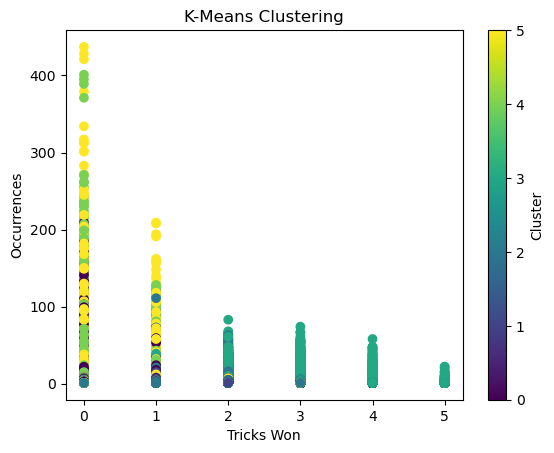

In [54]:
# Scatter plot of the first two columns, colored by cluster
plt.scatter(hand_results_df['tricks_won'], hand_results_df['occurrences'], 
            c=hand_results_df['cluster'], cmap='viridis')
plt.xlabel('Tricks Won')
plt.ylabel('Occurrences')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

### Finding optimal number of clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

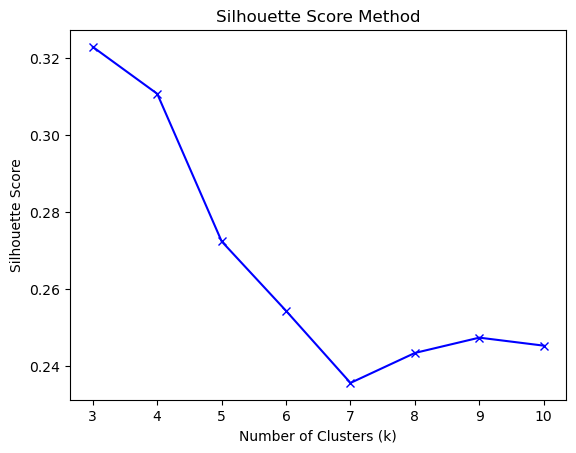

In [61]:
# List to store silhouette scores
silhouette_scores = []

# Define the range of clusters to try
k_range = range(3, 11)  # Try different numbers of clusters from 2 to 10

# Fit KMeans and compute silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X=scaled_data, sample_weight=sample_weights)
    cluster_labels = kmeans.fit_predict(X=scaled_data)
    silhouette_avg = silhouette_score(X=scaled_data, labels=cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


## Evaluation Metrics

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X=hand_results_df[cluster_fields].values, 
                                  labels=hand_results_df['cluster'])

In [57]:
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.12153117484869777


## Association Rules

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

In [37]:
hand_results_df.dtypes

tricks_won             int64
is_calling_player      int64
teammate_called        int64
has_right              int64
has_left               int64
has_Atrump             int64
has_Ktrump             int64
has_Qtrump             int64
has_Ttrump             int64
has_9trump             int64
num_off_A              int64
num_off_K              int64
num_off_Q              int64
num_suits              int64
partner_tricks         int64
player_seat            int64
player_seat1           int64
player_seat2           int64
player_seat3           int64
player_seat4           int64
occurrences            int64
num_trump              int64
team_tricks            int64
description           object
player_took_trick      int64
team_took_majority     int64
player_has_trump       int64
dtype: object

In [44]:
# Select the relevant columns for association rule mining
transactions = hand_results_df[association_rule_fields].astype('bool')

In [45]:
# Convert the dataset into a list of lists, where each inner list represents a transaction (hand)
#transactions = transactions.values.tolist()

In [46]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transactions, min_support=0.05, use_colnames=True)

In [47]:
frequent_itemsets

,support,itemsets
0,0.255274,(is_calling_player)
1,0.336083,(teammate_called)
2,0.803116,(player_took_trick)
3,0.939047,(player_has_trump)
4,0.646479,(team_took_majority)
...,...,...
312,0.052201,"(team_took_majority, player_has_trump, player_..."
313,0.051429,"(team_took_majority, player_has_trump, player_..."
314,0.050869,"(team_took_majority, player_has_trump, has_Ktr..."
315,0.050522,"(team_took_majority, player_has_trump, has_Ktr..."


In [48]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [52]:
# Print the top 10 rules sorted by confidence
rules.sort_values(by=["confidence"], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
307,"(teammate_called, has_Ktrump, player_took_trick)",(player_has_trump),0.053880,0.939047,0.053880,1.0,1.064910,0.003284,inf,0.064425
135,"(has_9trump, has_right)",(player_took_trick),0.060640,0.803116,0.060640,1.0,1.245150,0.011939,inf,0.209594
379,"(player_has_trump, has_right, has_Atrump)",(player_took_trick),0.054115,0.803116,0.054115,1.0,1.245150,0.010654,inf,0.208148
375,"(has_9trump, team_took_majority, player_took_t...",(player_has_trump),0.169564,0.939047,0.169564,1.0,1.064910,0.010335,inf,0.073399
370,"(has_Ttrump, team_took_majority, player_took_t...",(player_has_trump),0.173168,0.939047,0.173168,1.0,1.064910,0.010555,inf,0.073719
365,"(team_took_majority, has_Qtrump, player_took_t...",(player_has_trump),0.176245,0.939047,0.176245,1.0,1.064910,0.010743,inf,0.073995
360,"(team_took_majority, has_Ktrump, player_took_t...",(player_has_trump),0.183006,0.939047,0.183006,1.0,1.064910,0.011155,inf,0.074607
355,"(team_took_majority, has_Atrump, player_took_t...",(player_has_trump),0.188176,0.939047,0.188176,1.0,1.064910,0.011470,inf,0.075082
350,"(team_took_majority, has_left, player_took_trick)",(player_has_trump),0.176581,0.939047,0.176581,1.0,1.064910,0.010763,inf,0.074025
345,"(has_right, team_took_majority)","(player_has_trump, player_took_trick)",0.177779,0.771229,0.177779,1.0,1.296632,0.040671,inf,0.278235


In [55]:
rules[rules['confidence']<1.0].sort_values(by=["confidence"], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
194,"(is_calling_player, team_took_majority)","(player_has_trump, player_took_trick)",0.203286,0.771229,0.199772,0.982712,1.274216,0.042992,13.233016,0.270114
190,"(is_calling_player, player_has_trump, team_too...",(player_took_trick),0.203286,0.803116,0.199772,0.982712,1.223624,0.036509,11.388551,0.229387
31,"(is_calling_player, team_took_majority)",(player_took_trick),0.203286,0.803116,0.199772,0.982712,1.223624,0.036509,11.388551,0.229387
484,"(has_Atrump, is_calling_player, player_has_tru...",(player_took_trick),0.100485,0.803116,0.098727,0.982513,1.223376,0.018027,11.258758,0.202987
488,"(has_Atrump, is_calling_player, team_took_majo...","(player_has_trump, player_took_trick)",0.100485,0.771229,0.098727,0.982513,1.273957,0.021231,13.082202,0.239067
218,"(is_calling_player, has_Atrump, team_took_majo...",(player_took_trick),0.100485,0.803116,0.098727,0.982513,1.223376,0.018027,11.258758,0.202987
495,"(is_calling_player, team_took_majority, has_Kt...","(player_has_trump, player_took_trick)",0.101884,0.771229,0.100093,0.982423,1.273841,0.021517,13.015638,0.239360
221,"(is_calling_player, team_took_majority, has_Kt...",(player_took_trick),0.101884,0.803116,0.100093,0.982423,1.223265,0.018268,11.201472,0.203220
491,"(is_calling_player, player_has_trump, team_too...",(player_took_trick),0.101884,0.803116,0.100093,0.982423,1.223265,0.018268,11.201472,0.203220
224,"(is_calling_player, team_took_majority, has_Qt...",(player_took_trick),0.101246,0.803116,0.099321,0.980986,1.221475,0.018009,10.354728,0.201743
